In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('census.csv')

In [3]:
df.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
set(df['income'])

{' <=50K', ' >50K'}

<AxesSubplot:xlabel='income', ylabel='count'>

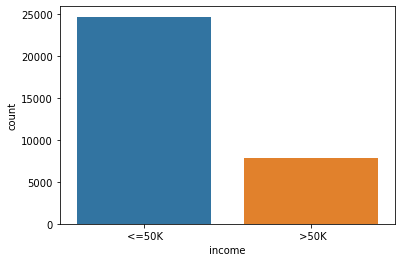

In [6]:
sns.countplot(x=df['income'])

In [7]:
X_df = df.iloc[:,0:14]

In [8]:
X_df.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [9]:
y_df = df.iloc[:,14]

In [10]:
y_df.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: income, dtype: object

In [11]:
le = LabelEncoder()

In [12]:
label_Workclass = le
label_education = le
label_marital = le
label_occupation = le
label_relationship = le
label_race = le
label_sex = le
label_country = le

In [13]:
X_df['workclass']= label_Workclass.fit_transform(X_df['workclass'])
X_df['education']= label_education.fit_transform(X_df['education'])
X_df['marital-status']= label_marital.fit_transform(X_df['marital-status'])
X_df['occupation']= label_occupation.fit_transform(X_df['occupation'])
X_df["relationship"]= label_relationship.fit_transform(X_df["relationship"])
X_df['race']= label_race.fit_transform(X_df['race'])
X_df['sex']= label_sex.fit_transform(X_df['sex'])
X_df['native-country']= label_country.fit_transform(X_df['native-country'])

In [14]:
X_df.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5


In [15]:
X_df.shape

(32561, 14)

In [16]:
sc = StandardScaler()

In [17]:
X_df = sc.fit_transform(X_df)

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X_df,y_df,test_size=0.20,random_state=42)

In [19]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((26048, 14), (6513, 14), (26048,), (6513,))

## Classificação - Naive Bayes = 80,9%

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [21]:
nb = GaussianNB()

In [22]:
nb.fit(X_train,y_train)

GaussianNB()

In [23]:
pred_nb = nb.predict(X_test)

In [24]:
accuracy_score(y_test,pred_nb)

0.8093044679871028

In [25]:
print(classification_report(y_test,pred_nb))

              precision    recall  f1-score   support

       <=50K       0.82      0.95      0.88      4942
        >50K       0.71      0.36      0.48      1571

    accuracy                           0.81      6513
   macro avg       0.77      0.66      0.68      6513
weighted avg       0.80      0.81      0.79      6513



0.8093044679871028

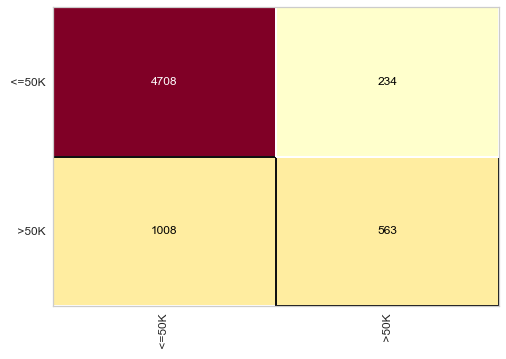

In [26]:
cm = ConfusionMatrix(nb)
cm.fit(X_test, y_test)
cm.score(X_test,y_test)

## Classificação - Arvore de Decisão = 82,15%


In [27]:
ohe_census = ColumnTransformer(transformers=[('OneHot',OneHotEncoder(),[1,3,5,6,7,8,9,13])], remainder='passthrough')
X_df_ohe = ohe_census.fit_transform(X_df).toarray()

In [28]:
X_train_ohe,X_test_ohe,y_train,y_test = train_test_split(X_df_ohe,y_df,test_size=0.20,random_state=42)

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
ad = DecisionTreeClassifier(criterion='entropy', random_state=42)
ad.fit(X_train_ohe,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [31]:
pred_ad = ad.predict(X_test_ohe)

In [32]:
accuracy_score(y_test,pred_ad)

0.8215875940426839

0.8215875940426839

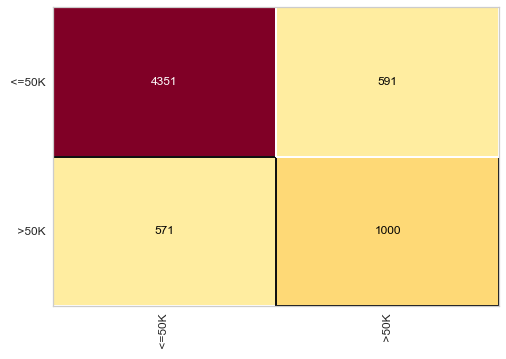

In [33]:
cmad = ConfusionMatrix(ad)
cmad.fit(X_test_ohe, y_test)
cmad.score(X_test_ohe,y_test)

In [34]:
print(classification_report(y_test,pred_ad))

              precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      4942
        >50K       0.63      0.64      0.63      1571

    accuracy                           0.82      6513
   macro avg       0.76      0.76      0.76      6513
weighted avg       0.82      0.82      0.82      6513



## Classificação - Random Forest = 86,25%


In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc = RandomForestClassifier(n_estimators=400, criterion='entropy', random_state=42)
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=400, random_state=42)

In [37]:
pred_RF = rfc.predict(X_test)

In [38]:
accuracy_score(y_test,pred_RF)

0.862582527253186

0.862582527253186

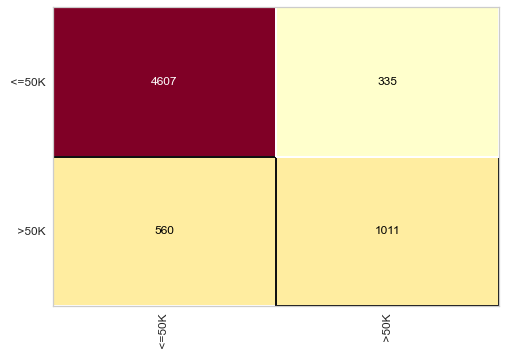

In [39]:
cmrfc = ConfusionMatrix(rfc)
cmrfc.fit(X_test, y_test)
cmrfc.score(X_test,y_test)

In [41]:
print(classification_report(y_test,pred_RF))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      4942
        >50K       0.75      0.64      0.69      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.79      0.80      6513
weighted avg       0.86      0.86      0.86      6513



## Classificação - kNN = 84,44%


In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier(n_neighbors=10)

In [44]:
knn.fit(X_train_ohe,y_train)

KNeighborsClassifier(n_neighbors=10)

In [45]:
pred_knn = knn.predict(X_test_ohe)

In [46]:
accuracy_score(y_test,pred_knn)

0.8444649163212038

0.8444649163212038

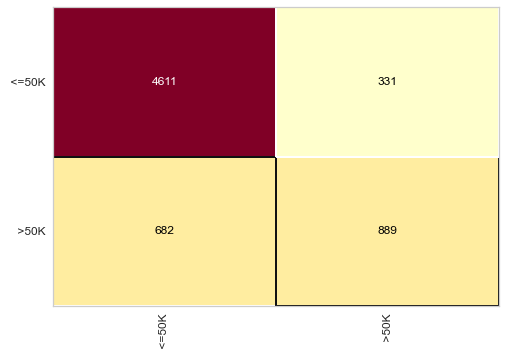

In [47]:
cmknn = ConfusionMatrix(knn)
cmknn.fit(X_test_ohe, y_test)
cmknn.score(X_test_ohe,y_test)

In [48]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      4942
        >50K       0.73      0.57      0.64      1571

    accuracy                           0.84      6513
   macro avg       0.80      0.75      0.77      6513
weighted avg       0.84      0.84      0.84      6513



## Classificação - Regressão Logistica = 85,76 %

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr = LogisticRegression(random_state = 42)

In [51]:
lr.fit(X_train_ohe,y_train)

C:\Users\Douglas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [52]:
lr.intercept_

array([-1.9241827])

In [53]:
lr.coef_

array([[-0.23406154,  0.60392595, -0.07287634, -0.1121887 ,  0.08550082,
         0.23617808, -0.42493389, -0.20751135, -0.8575445 , -0.05893177,
        -0.24865937, -0.08630946,  0.48599664,  0.3430273 ,  0.05455964,
         0.05854705, -0.40792746, -0.11511949, -0.15083473,  0.08394692,
        -0.14770596, -0.06027115, -0.84761016,  0.17752152, -0.06374096,
        -0.65232879,  1.46557775,  1.39513007, -0.63277462, -1.12408872,
        -0.82434789, -0.61067926, -0.34625024,  0.09046954, -0.22248136,
         0.15820094,  0.85968746, -0.98600277, -0.46288942, -0.18557709,
        -0.70294792, -1.49271146,  0.55653354,  0.63166349,  0.38662929,
         0.75219122, -0.02002669, -0.29381548,  0.11887782, -0.72305767,
        -1.14572584, -0.01238812,  1.07259782, -0.52923162,  0.08192379,
        -0.12360809, -0.45104143,  0.03844589, -0.9232885 , -0.06022296,
        -0.07738983,  1.04915279,  0.46833845, -0.67674985, -1.2995245 ,
         0.4448427 , -0.9315974 , -0.53645872, -0.1

In [54]:
pred_lr = lr.predict(X_test_ohe)

In [55]:
accuracy_score(y_test,pred_lr)

0.8576692768309535

0.8576692768309535

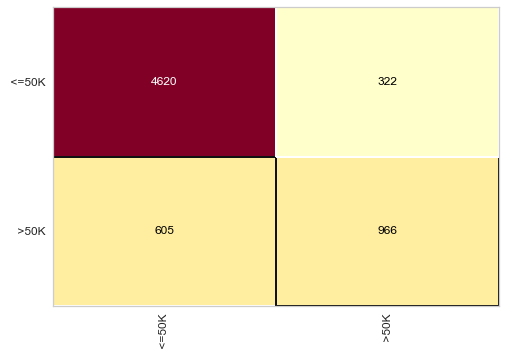

In [56]:
cmlr = ConfusionMatrix(lr)
cmlr.fit(X_train_ohe,y_train)
cmlr.score(X_test_ohe,y_test)

In [57]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      4942
        >50K       0.75      0.61      0.68      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513



## Classificação - SVM = 86,22%

In [58]:
from sklearn.svm import SVC

In [121]:
svm = SVC(kernel='rbf', random_state=42, C=7.0)

In [122]:
svm.fit(X_train_ohe,y_train)

SVC(C=7.0, random_state=42)

In [123]:
pred_svm = svm.predict(X_test_ohe)

In [124]:
accuracy_score(y_test,pred_svm)

0.8622754491017964

0.8622754491017964

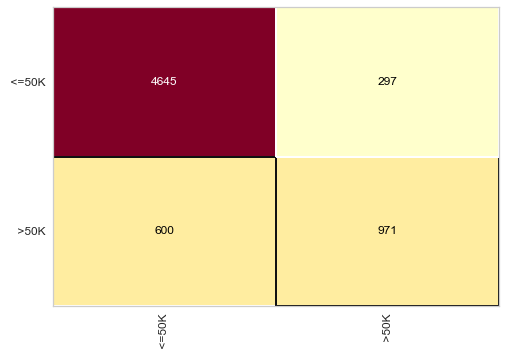

In [125]:
cmsvm = ConfusionMatrix(svm)
cmsvm.fit(X_train_ohe,y_train)
cmsvm.score(X_test_ohe,y_test)

In [126]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91      4942
        >50K       0.77      0.62      0.68      1571

    accuracy                           0.86      6513
   macro avg       0.83      0.78      0.80      6513
weighted avg       0.86      0.86      0.86      6513

